In [95]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
import time

driver = webdriver.Chrome()

driver.get("https://www.amazon.com")

In [96]:
keyword = "headset"
# assigning any keyword for searching
search_box = driver.find_element(By.ID, 'twotabsearchtextbox')
# typing the keyword in searchbox
search_box.send_keys(keyword)
# creating WebElement for a search button
search_button = driver.find_element(By.ID, 'nav-search-submit-button')
# clicking search_button
search_button.click()
# waiting for the page to download
driver.implicitly_wait(5)

In [128]:
# Arrays for keeping data
product_name = []
product_asin = []
product_price = []
product_ratings = []
product_ratings_num = []
product_link = []

In [129]:
while True:
    # Finding all items on the page
    
    items = wait(driver, 30).until(EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "s-result-item s-asin")]')))
    
    for item in items:
        # finding name
        name = item.find_element(By.XPATH, './/span[@class="a-size-medium a-color-base a-text-normal"]')
        product_name.append(name.text)

        # finding ASIN number 
        data_asin = item.get_attribute("data-asin")
        product_asin.append(data_asin)

        # finding price
        whole_price = item.find_elements(By.XPATH, './/span[@class="a-price-whole"]')
        fraction_price = item.find_elements(By.XPATH, './/span[@class="a-price-fraction"]')

        if whole_price != [] and fraction_price != []:
            price = '.'.join([whole_price[0].text, fraction_price[0].text])
        else:
            price = 0
        product_price.append(price)

        # finding ratings box
        ratings_box = item.find_elements(By.XPATH, './/div[@class="a-row a-size-small"]/span')

        # finding ratings and ratings_num
        if ratings_box != []:
            ratings = ratings_box[0].get_attribute('aria-label')
            ratings_num = ratings_box[1].get_attribute('aria-label')
        else:
            ratings, ratings_num = 0, 0

        product_ratings.append(ratings)
        product_ratings_num.append(str(ratings_num))
    
    next_button = driver.find_elements(By.XPATH, '//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    if len(next_button) == 0:
        break
    else:
        # Clicking the "Next" button to go to the next page
        next_button[0].click()
        time.sleep(10)  

In [144]:
import pandas as pd


product_price = [str(p).replace('\uff0c', ',') for p in product_price]
rows = zip(product_name, product_asin, product_price, product_ratings, product_ratings_num)

df = pd.DataFrame(rows, columns=['Name', 'Asin', 'Price', 'Rating', 'Rating_Num'])

df.to_excel("product_list.xlsx", index=False)


### Cleaning Data

In [145]:
df

,Name,Asin,Price,Rating,Rating_Num
0,HyperX - Cloud Core Wired DTS Headphone:X Gami...,B08HQW9SGP,29.99,4.5 out of 5 stars,"120,267"
1,"Logitech H390 Wired Headset for PC/Laptop, Ste...",B09XQ5WSF5,24.99,4.4 out of 5 stars,"49,368"
2,BENGOO G9000 Stereo Gaming Headset for PS4 PC ...,B01H6GUCCQ,25.99,4.3 out of 5 stars,"98,456"
3,SENZER SG500 Surround Sound Pro Gaming Headset...,B08FX35S7K,29.99,4.3 out of 5 stars,"8,982"
4,"HyperX Cloud Stinger – Gaming Headset, Lightwe...",B0BHV2JT81,49.99,4.4 out of 5 stars,"22,383"
...,...,...,...,...,...
421,New bee Wireless Headset Bluetooth Headset wit...,B0BRRCJM6R,39.99,4.3 out of 5 stars,91
422,USB Headset for Zoom Online Meeting Video Conf...,B08L3FRW89,25.99,4.2 out of 5 stars,100
423,"KUNSLUCK PS VR2 Accessories Kit, Lens Protecto...",B0BX9CTCN8,13.99,3.5 out of 5 stars,2
424,Gaming Headset with 7.1 Surround Sound and Noi...,B0B82SLGB3,19.99,0,0


In [150]:
print(df['Name'].dtype)
print(df['Asin'].dtype)
print(df['Price'].dtype)
print(df['Rating'].dtype)
print(df['Rating_Num'].dtype)

object
object
object
object
object


In [ ]:
# Converting types from object
df['Price'] = df['Price'].astype(float)
df['Name'] = df['Name'].astype(str)
df['Asin'] = df['Asin'].astype(str)
df['Rating'] = df['Rating'].astype(str)
df['Rating_Num'] = df['Rating_Num'].str.replace(',', '').astype(int)

In [ ]:
# Cutting the string for Rating to convert to float
df['Rating'] = df['Rating'].astype(str).str[:3]
df['Rating'] = df['Rating'].astype(float)

In [185]:
# Checking for Duplicates
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_rows

,Name,Asin,Price,Rating,Rating_Num
7,"Logitech H390 Wired Headset for PC/Laptop, Ste...",B09XQ5WSF5,24.99,4.4,49368
34,HyperX - Cloud Core Wired DTS Headphone:X Gami...,B08HQW9SGP,29.99,4.5,120267
69,HyperX CloudX Stinger Core - Official Licensed...,B07KYC1VL7,19.99,4.5,26667
130,Cyber Acoustics 3.5mm Stereo Headset (AC-5002)...,B074JHQ8M3,17.35,4.2,11840
147,Trucker Bluetooth Angteela Headset with Microp...,B087QD67SS,42.99,4.3,9146
217,Sonitum Headset with Microphone - Noise Cancel...,B09JTTD2S4,17.97,4.3,3396
240,Emonoo Wired Headphone with Noise Cancelling M...,B0B947KV8B,19.99,4.3,114
263,Tatybo Gaming Headset for PS4 PS5 Xbox One Swi...,B09FXFSY6R,19.98,4.4,3144
295,TECKNET Trucker Bluetooth Headset with Microph...,B08RB26C8X,59.99,4.1,8915
333,"Bluetooth Headset with Microphone,V5.1,Noise C...",B09XFGFBLG,25.98,4.1,728


In [186]:
# Dropping any duplicates
df.drop_duplicates(subset=['Asin'], keep='first', inplace=True)

C:\Users\Ali\AppData\Local\Temp\ipykernel_20276\811868314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['Asin'], keep='first', inplace=True)


In [187]:
df

,Name,Asin,Price,Rating,Rating_Num
0,HyperX - Cloud Core Wired DTS Headphone:X Gami...,B08HQW9SGP,29.99,4.5,120267
1,"Logitech H390 Wired Headset for PC/Laptop, Ste...",B09XQ5WSF5,24.99,4.4,49368
2,BENGOO G9000 Stereo Gaming Headset for PS4 PC ...,B01H6GUCCQ,25.99,4.3,98456
3,SENZER SG500 Surround Sound Pro Gaming Headset...,B08FX35S7K,29.99,4.3,8982
4,"HyperX Cloud Stinger – Gaming Headset, Lightwe...",B0BHV2JT81,49.99,4.4,22383
...,...,...,...,...,...
417,"GIZORI Gaming Headset, Xbox Headset, Gaming He...",B09QKBV3KY,19.99,4.4,583
418,HyperX Cloud Alpha Wireless - Gaming Headset f...,B09TRW57WB,159.99,4.5,120267
420,Anivia Computer Gaming Headset -3.5mm Wired He...,B092M5DR6Q,21.61,4.4,155
421,New bee Wireless Headset Bluetooth Headset wit...,B0BRRCJM6R,39.99,4.3,91


#### Question 1: What is the distribution of headset prices in the dataset? 

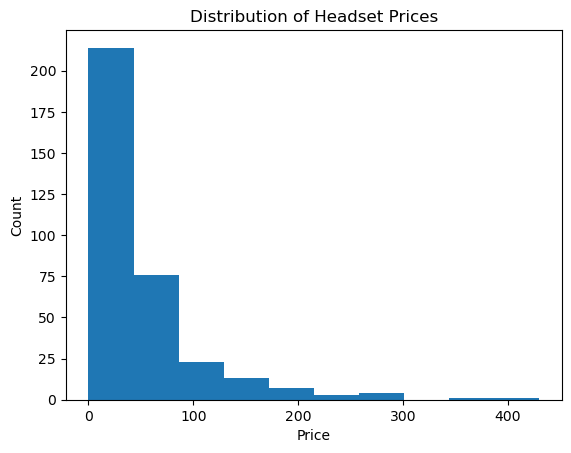

In [192]:
import matplotlib.pyplot as plt

# Creating a histogram of the headset prices
plt.hist(df['Price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Headset Prices')
plt.show()

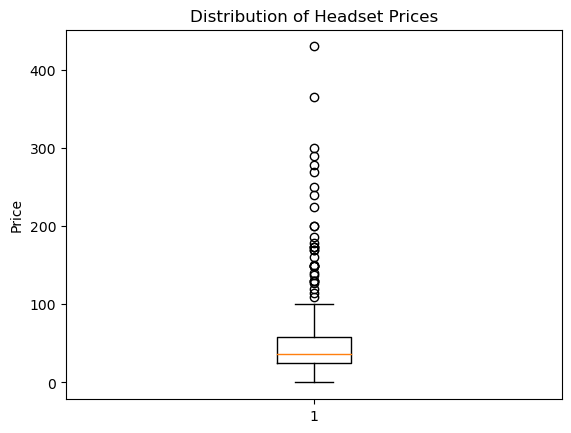

In [193]:
# Seeing how the boxplot would look like
plt.boxplot(df['Price'])
plt.ylabel('Price')
plt.title('Distribution of Headset Prices')
plt.show()

#### Question 2: Is there a correlation between price and rating? 

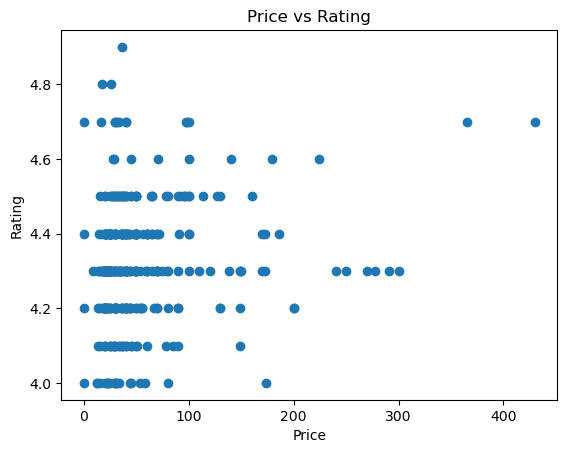

Pearson correlation coefficient: 0.163


In [195]:
import scipy.stats as stats

# Creating a scatter plot of price vs rating
plt.scatter(df['Price'], df['Rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price vs Rating')
plt.show()

# Calculating the Pearson correlation coefficient
corr, _ = stats.pearsonr(df['Price'], df['Rating'])
print('Pearson correlation coefficient: %.3f' % corr)

#### Question 3: How do the ratings of the headsets vary by price range? 

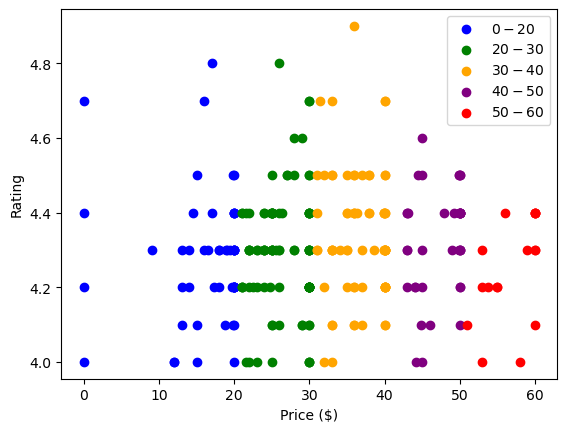

In [198]:
# Defining the price ranges
price_ranges = [(0, 20), (20, 30), (30, 40), (40, 50), (50, 60)]

# Defining the colors for the price ranges
colors = ['blue', 'green', 'orange', 'purple', 'red']

# Creating a scatter plot for each price range
for i, price_range in enumerate(price_ranges):
    x = df[(df['Price'] >= price_range[0]) & (df['Price'] < price_range[1])]['Price']
    y = df[(df['Price'] >= price_range[0]) & (df['Price'] < price_range[1])]['Rating']
    plt.scatter(x, y, color=colors[i], label=f'${price_range[0]}-${price_range[1]}')

# Adding axis labels and legend
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.legend()

# Displaying the plot
plt.show()

#### Question 4: How many headsets fall under each rating category?

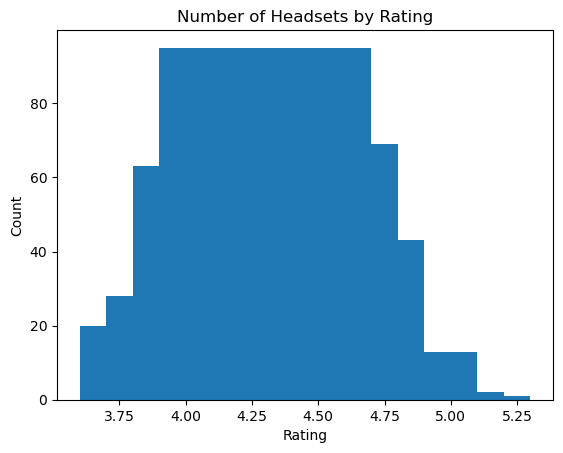

In [200]:
# grouping the data by the 'Rating' column and counting the number of occurrences for each unique value
rating_counts = df.groupby('Rating')['Name'].count()

# creating a bar chart to visualize the counts for each rating category
plt.bar(rating_counts.index, rating_counts.values)

# adding axis labels and a chart title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Number of Headsets by Rating')

# displaying the chart
plt.show()

#### Question 5: How many headsets fall under each price category?

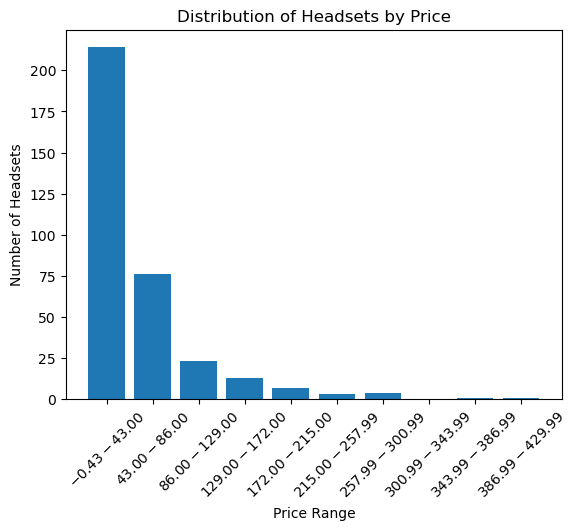

In [209]:
# Dividing the prices into 10 equal-sized bins
bins = pd.cut(df['Price'], bins=10)

# Counting the number of headsets in each bin
headsets_by_price = bins.value_counts().sort_index()

# Creating a bar chart that shows the number of headsets in each price interval
fig, ax = plt.subplots()
ax.bar(range(len(headsets_by_price)), headsets_by_price)
ax.set_xticks(range(len(headsets_by_price)))
ax.set_xticklabels(['${:.2f}-${:.2f}'.format(bin.left, bin.right) for bin in headsets_by_price.index], rotation=45)
ax.set_xlabel('Price Range')
ax.set_ylabel('Number of Headsets')
ax.set_title('Distribution of Headsets by Price')
plt.show()